
<!DOCTYPE html>
<html>
<head>
    <style>
        .center-image {
            display: block;
            margin: 0 auto;
        }
    </style>
</head>
<body>
    <img src="https://datascientest.com/es/wp-content/uploads/sites/7/2020/11/illu_regression_blog-16.png" alt="ilustracion" class="center-image">
</body>
</html>





### Lista de Pasos para Crear un Modelo de Regresi칩n Log칤stica

1. **Importaci칩n de Librer칤as**: Importar las librer칤as necesarias para la manipulaci칩n, visualizaci칩n y modelado de datos.
2. **Carga de Datos**: Cargar el conjunto de datos desde un archivo CSV.
3. **Exploraci칩n de Datos**: Explorar y entender la estructura de los datos.
4. **Preprocesamiento de Datos**: Convertir variables categ칩ricas, dividir datos en caracter칤sticas y etiquetas, y escalar las caracter칤sticas.
5. **Divisi칩n del Conjunto de Datos**: Dividir los datos en conjuntos de entrenamiento y prueba.
6. **Entrenamiento del Modelo**: Entrenar el modelo de regresi칩n log칤stica con el conjunto de entrenamiento.
7. **Evaluaci칩n del Modelo**: Evaluar el modelo utilizando m칠tricas de rendimiento.
8. **Visualizaci칩n de Resultados**: Visualizar los resultados de la evaluaci칩n.


A conuacion relizaremos un modelo de regresion logistica basico para ilustrar. Cabe destacar que en la diaria del cientifico de datos. este procedimiento no ser치 nada censillo. y tomara mucho mas analisis, codigo, etc.  es por esto que este notebook es a modo de ilustracion con datos imberosimiles. es importante que se tenga en cuenta esto para cuando se necesite realizar un modelo de regresion logistica. Este note es complemento del contenido del [blog Nodo - Data](https://nododata.blogspot.com/2024/05/regresion-logistica.html) 游놓



## Importaci칩n de bibliotecas
Comenzaremos importando las bibliotecas necesarias para nuestro an치lisis y modelo.

In [149]:
# librer칤as necesarias:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Carga de datos
A continuaci칩n, procedemos con la carga de datos para nuestro an치lisis. Los datos son de la plataforma kaggel acontinuacion te dejo el [Link](https://www.kaggle.com/datasets/dragonheir/logistic-regression) para que puedas verlos.

In [150]:
# Carga de Datos
df = pd.read_csv("Social_Network_Ads.csv")

## Consistencia de datos
En esta parte, nos enfocaremos en explorar la consistencia estructural de los datos. Revisaremos el tipo de variables presentes y si existen valores nulos o faltantes. Esta exploraci칩n nos permitir치 comprender mejor la calidad de los datos antes de proceder con el an치lisis y la modelizaci칩n.

In [151]:
# Informacion estructural de nuestros datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [152]:
df.describe(include= 'all')

User ID  Gender         Age  EstimatedSalary   Purchased
count   4.000000e+02     400  400.000000       400.000000  400.000000
unique           NaN       2         NaN              NaN         NaN
top              NaN  Female         NaN              NaN         NaN
freq             NaN     204         NaN              NaN         NaN
mean    1.569154e+07     NaN   37.655000     69742.500000    0.357500
std     7.165832e+04     NaN   10.482877     34096.960282    0.479864
min     1.556669e+07     NaN   18.000000     15000.000000    0.000000
25%     1.562676e+07     NaN   29.750000     43000.000000    0.000000
50%     1.569434e+07     NaN   37.000000     70000.000000    0.000000
75%     1.575036e+07     NaN   46.000000     88000.000000    1.000000
max     1.581524e+07     NaN   60.000000    150000.000000    1.000000

In [153]:
# Elminamos la columna que no nos sirve
df = df.drop(['User ID'],axis=1)

In [154]:
# Conclusiones:

#- Se cuenta con un total de 400 registros, cada uno representando a una persona distinta identificada por un identificador 칰nico.
#- De las 5 variables disponibles, 4 son relevantes para nuestro an치lisis, ya que una de ellas corresponde al identificador 칰nico. Las variables incluyen:

#- Gender: Variable categ칩rica nominal que representa el g칠nero de la persona.
#- Age: Variable num칠rica discreta que indica la edad de la persona.
#- EstimatedSalary: Variable num칠rica continua que representa el salario estimado de la persona.
#- Purchased: Variable dicot칩mica que sirve como variable objetivo a predecir, indicando si la persona realiz칩 una compra o no.

In [155]:
# Valores nuelos en nuestros datos
nulo = df.isnull().sum()
print(nulo)

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [156]:
# Conclusiones:

#- Despu칠s de realizar un Vision inicial de los datos, se observa que no se encuentran valores nulos en las columnas de inter칠s.
#- Todos los valores parecen ser v치lidos y no requieren un tratamiento especial en esta etapa del an치lisis.

In [157]:
# Variable Objetivo
print(df['Purchased'].value_counts())


Purchased
0    257
1    143
Name: count, dtype: int64


In [158]:
#- Conclusiones:
#- Se ha realizado un an치lisis de la variable objetivo 'Purchased', la cual presenta dos valores posibles: 1 (realiz칩 la compra)
#- y 0 (no realiz칩 la compra). Es importante destacar que se observa un desbalance en los datos, lo cual puede ocasionar
#- problemas en la construcci칩n del modelo predictivo. 

#- Para ilustrar este punto, consideremos un ejemplo hipot칠tico: supongamos que tenemos 100 fotos, de las cuales 90 son de autos
#- y 10 son de motos. Si entrenamos un modelo para identificar si en una foto hay un auto o una moto, y dado el desbalance de clases,
#- es posible que el modelo clasifique todas las fotos como autos para maximizar su precisi칩n. Aunque este modelo tendr칤a una alta precisi칩n
#- (90%), en realidad no est치 aprendiendo a distinguir entre autos y motos, sino que simplemente est치 prediciendo la clase mayoritaria.

#- Por lo tanto, es fundamental abordar el desbalance de clases en los datos para evitar sesgos en el modelo y garantizar su capacidad de generalizaci칩n.

In [159]:
df

Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]

<div style="width: 100%; height: 200px; background-color: #1EA4D9; border-radius: 20px; display: flex; justify-content: center; align-items: center; color: white; font-size: 24px; font-weight: bold; letter-spacing: 2px;">
 Analisis y Visualizaci칩n de Datos
</div>

A continuaci칩n, vamos a explorar los datos mediante una serie de gr치ficos que nos ayudar치n a comprender mejor nuestra informaci칩n y facilitar치n la tarea de modelado posterior. Cada gr치fico estar치 acompa침ado de una interpretaci칩n detallada, lo que resulta fundamental para evitar interpretaciones incorrectas en el futuro. Es crucial que los notebooks que creemos sean atemporales y f치ciles de entender, especialmente en proyectos reales.

In [160]:
#Definimos la paleta de colores que vamos a utilizar. 
paleta = ("#f72585", "#4cc9f0")

A continuaci칩n, crearemos un gr치fico de torta para analizar la proporci칩n de g칠nero en nuestros datos. Es importante tener en cuenta que nuestra variable objetivo, "Purchased", indica si el cliente realiz칩 una compra o no. En ocasiones, nos enfrentamos a situaciones en las que la variable objetivo no est치 claramente definida, pero en este caso, es crucial basar nuestro an치lisis en esta variable. Estamos buscando patrones que puedan explicar la relaci칩n entre la variable objetivo y las demas.

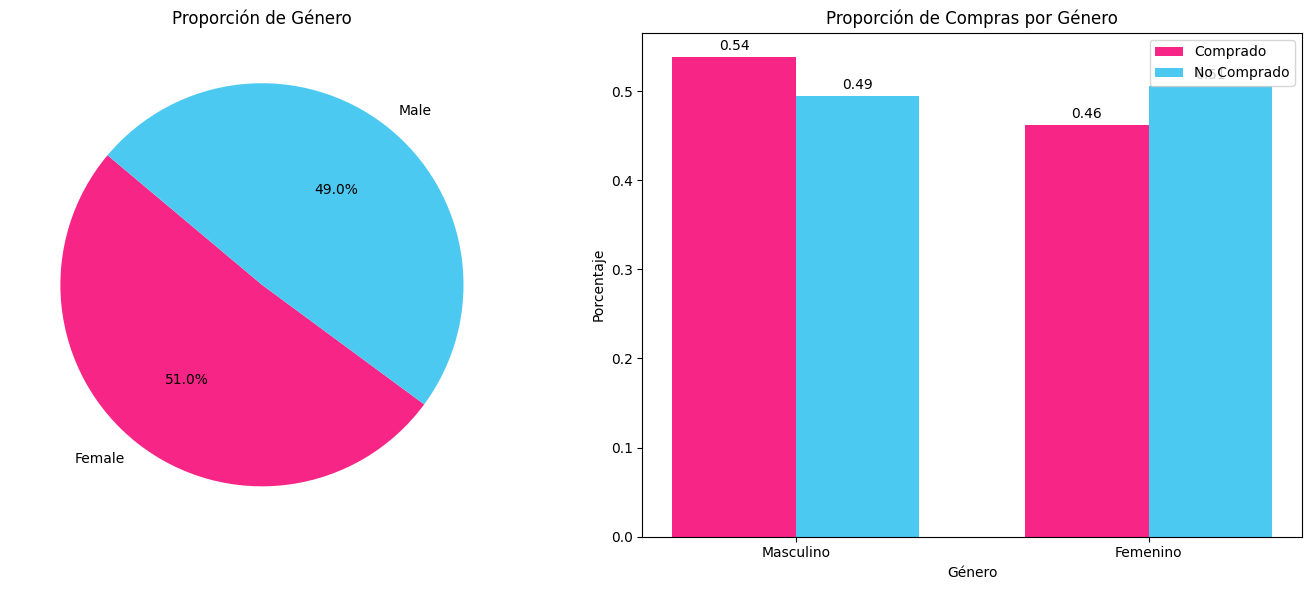

In [161]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

gender_counts = df['Gender'].value_counts()
ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=paleta, startangle=140)
ax1.set_title('Proporci칩n de G칠nero')

grouped = df.groupby('Purchased')['Gender'].value_counts(normalize=True).unstack()

bar_width = 0.35
index = np.arange(len(grouped.columns))

bars_male = ax2.bar(index - bar_width/2, grouped.loc[1], bar_width, label='Comprado', color=paleta[0])
bars_female = ax2.bar(index + bar_width/2, grouped.loc[0], bar_width, label='No Comprado', color=paleta[1])

for bars in [bars_male, bars_female]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

ax2.set_xlabel('G칠nero')
ax2.set_ylabel('Porcentaje')
ax2.set_title('Proporci칩n de Compras por G칠nero')
ax2.set_xticks(index)
ax2.set_xticklabels(['Masculino', 'Femenino'])
ax2.legend()

plt.tight_layout()
plt.show()

In [162]:
# Interpretacion: 

# Como podemos observar en el gr치fico de la izquierda, la proporci칩n de g칠nero en nuestros datos est치 equilibrada,
# siendo el g칠nero femenino el m치s registrado con un 51%.

# En el gr치fico de la derecha, podemos ver c칩mo se relaciona el g칠nero con la variable objetivo. En este caso,
# notamos una diferencia entre el g칠nero masculino y femenino, siendo los hombres los clientes que m치s compran, con un 54% de compras.

In [163]:
# Interpretacion:
# Analizando los datos podemos obsercar que en cuanto a genero los hombres son los que mas compran en comparacion que las mujeres 

Una vez que tenemos la proporci칩n de g칠neros con la variable objetivo, realizaremos un an치lisis del salario estimado en relaci칩n con los g칠neros. Esto nos puede dar un indicio de si el salario puede ser una variable de inter칠s.

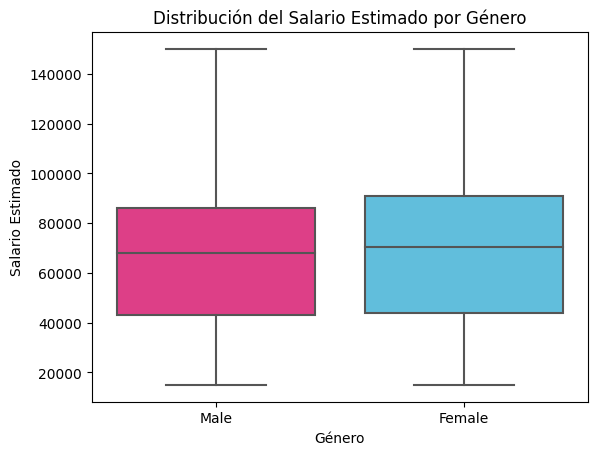

In [164]:
#  gr치fico de caja y bigotes
sns.boxplot(data=df, x='Gender', y='EstimatedSalary', palette=paleta)
plt.title('Distribuci칩n del Salario Estimado por G칠nero')
plt.xlabel('G칠nero')
plt.ylabel('Salario Estimado')
plt.show()

In [165]:
# Conclusiones

# Se observa que los rangos salariales para hombres y mujeres son similares, sin diferencias significativas entre ellos.
# No se identificaron valores at칤picos en la distribuci칩n de salarios para ning칰n g칠nero. Aunque la media salarial para mujeres
# es ligeramente superior a la de los hombres, esta diferencia no resulta significativa.

Como se mencion칩 anteriormente, ya tenemos una variable objetivo, y el an치lisis debe girar en torno a esta principalmente. Ya tenemos una idea de que los hombres realizan m치s compras que las mujeres, pero no es una diferencia significativa, al menos no en una primera instancia. Lo que realizaremos ahora ser치 una visualizaci칩n que nos permita observar la relaci칩n entre la variable objetivo , el rango de edad de nuestros datos y el Genero.

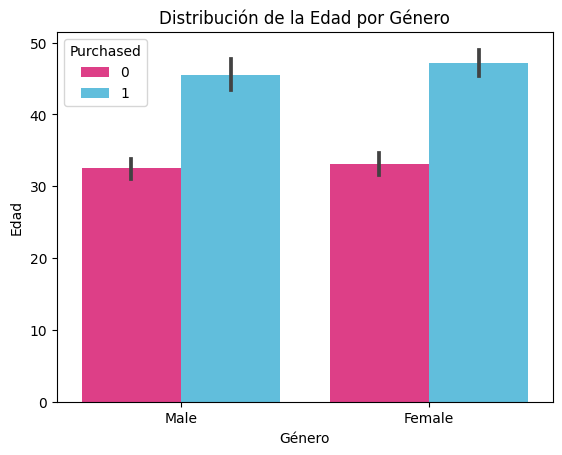

In [166]:
ax = sns.barplot(data=df, x='Gender', y='Age', hue='Purchased', palette=paleta)
plt.title('Distribuci칩n de la Edad por G칠nero')
plt.xlabel('G칠nero')
plt.ylabel('Edad')
ax.legend(title='Purchased', loc='upper left')
plt.show()

In [167]:
# Interpretaci칩n:

# Se observa que la distribuci칩n entre si compra o no con respecto a la edad es similar. Pero podemos notar que el rango de edad que va hasta 30 no realiza compras,
# independientemente del g칠nero. Por otra parte, tenemos que aquellos clientes que realizan compras tienen un rango de edad m치s grande,
# llegando hasta los 50 a침os aproximadamente. Esto nos brinda informaci칩n acerca de un punto de corte. Podr칤amos decir, en un principio,
# que personas mayores a 30-35 a침os tienen m치s probabilidad de realizar una compra, independientemente del g칠nero. 

Ahora realizaremos un gr치fico de caja y bigote que nos ilustre la distribuci칩n de la edad con respecto al g칠nero de los registros en nuestros datos.

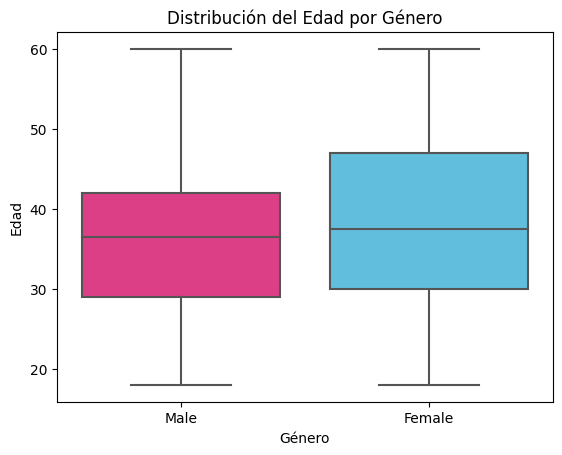

In [168]:
#  gr치fico de caja y bigotes
sns.boxplot(data=df, x='Gender', y='Age',palette= paleta)
plt.title('Distribuci칩n del Edad por G칠nero')
plt.xlabel('G칠nero')
plt.ylabel('Edad')
plt.show()

In [169]:
# Conclusiones

# En la gr치fica se observa que el rango de edad es similar tanto para hombres como para mujeres. Sin embargo,
# la concentraci칩n de edades para las mujeres es m치s notable, abarcando aproximadamente desde los 30 a침os hasta los 45 a침os,
# mientras que para los hombres, la concentraci칩n de datos en cuanto a edad llega hasta los 41 a침os aproximadamente.

Como hemos podido observar en distintas gr치ficas, ya nos podemos hacer una idea de c칩mo se relacionan las dem치s variables con la variable objetivo. Muchas veces, encontrar lo que denomino un "punto de corte" que nos brinde una informaci칩n clara entre todas las variables con la variable objetivo puede ser desafiante y puede guardar una similitud con encontrar una aguja en un pajar. Pero, a medida que tu capacidad de hacer preguntas a los datos mejora, llegar치s m치s r치pido a encontrar informaci칩n valiosa, aunque no est칠 relacionada con lo que estabas intentando responder inicialmente. Dado que el conjunto de datos que tenemos contiene pocas variables, es f치cil hacer un gr치fico que involucre todas las variables. Esto nos dar치 una claridad mayor acerca de si la compra o no esconde un patr칩n subyacente.

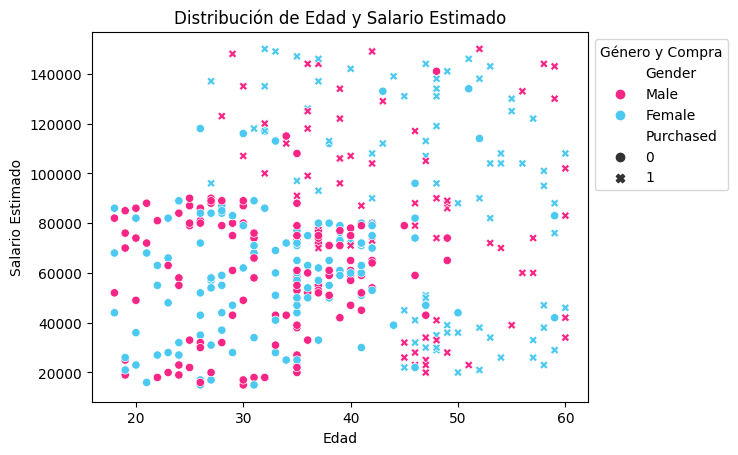

In [170]:
# gr치fico de dispersi칩n con colores diferenciados por g칠nero y compra
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Gender', style='Purchased',palette= paleta)
plt.title('Distribuci칩n de Edad y Salario Estimado')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend(title='G칠nero y Compra', bbox_to_anchor=(1, 1))
plt.show()

In [171]:
# Conclusiones:

# El gr치fico nos brinda informaci칩n importante de manera condensada. Podemos observar que el g칠nero est치 diferenciado por color y
# si el cliente compr칩 o no, por la forma de los puntos. En el eje X, tenemos la edad, y en el eje Y, el salario estimado.

# Se observa que las personas con edades entre 20 y 40 a침os y salarios de 20,000 a 80,000 no han realizado compras.
# En cambio, aquellos con edades y salarios mayores s칤 han realizado compras. Esto divide nuestras variables en dos categor칤as
# con sus respectivos valores: las personas con mayor edad y salario promedio son m치s propensas a realizar una compra.
# Para resaltar esta diferencia, realizaremos dos gr치ficos destacando el sector que no realiz칩 una compra.

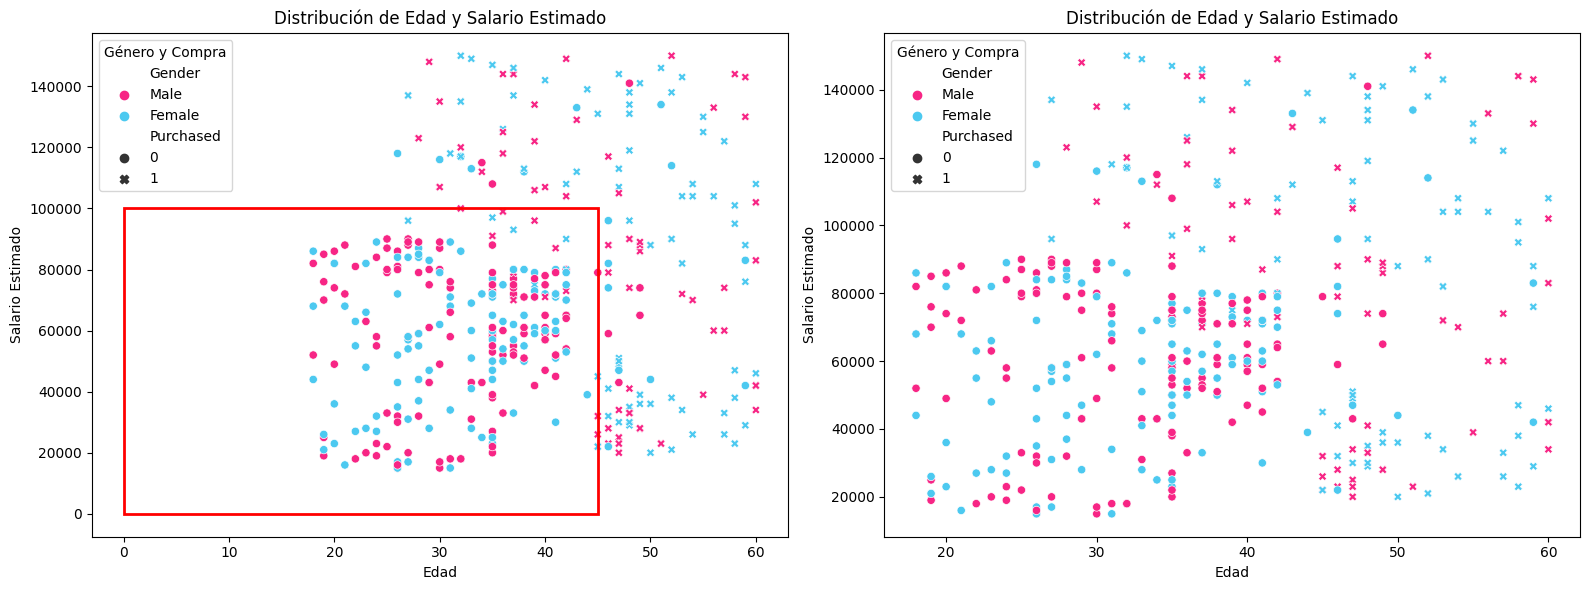

In [172]:
from matplotlib.patches import Rectangle
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Gender', style='Purchased', palette=paleta, ax=axs[0])
axs[0].set_title('Distribuci칩n de Edad y Salario Estimado')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Salario Estimado')
axs[0].legend(title='G칠nero y Compra')
# Crear el cuadrado en el primer gr치fico
rect = Rectangle((0, 0), 45, 100000, linewidth=2, edgecolor='red', facecolor='none')
axs[0].add_patch(rect)

sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Gender', style='Purchased', palette=paleta, ax=axs[1])
axs[1].set_title('Distribuci칩n de Edad y Salario Estimado')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Salario Estimado')
axs[1].legend(title='G칠nero y Compra')

plt.tight_layout()
plt.show()

Observamos en el gr치fico anterior que el umbral de decisi칩n para la compra est치 aproximadamente en 100,000. Ahora, realizaremos un gr치fico que muestre la proporci칩n de clientes que realizan la compra o no, en intervalos de salarios. Esto nos proporcionar치 m치s evidencia visual sobre lo que el gr치fico anterior nos mostr칩.

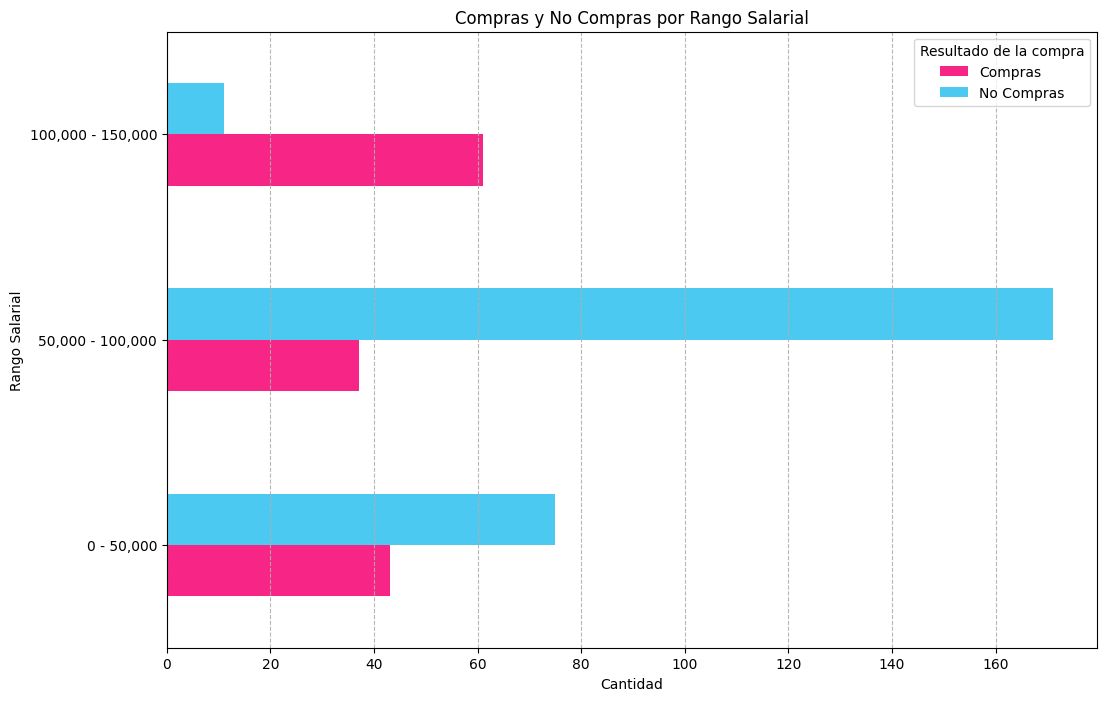

In [173]:
# Define los rangos salariales
bins = [0, 50000, 100000, 150000]

# Crea una nueva columna 'SalaryRange' que categorice los salarios en los rangos definidos
df['SalaryRange'] = pd.cut(df['EstimatedSalary'], bins=bins, right=False, labels=['0 - 50,000', '50,000 - 100,000', '100,000 - 150,000'])

# Calculo la proporci칩n de compras y no compras en cada rango salarial
purchase_ratio = df.groupby('SalaryRange')['Purchased'].mean()

# Calcula el total de compras y no compras en cada rango salarial
total_purchases = df.groupby('SalaryRange')['Purchased'].count()

# Crea un df con las proporciones de compras y no compras
data = pd.DataFrame({'Compras': purchase_ratio * total_purchases, 'No Compras': (1 - purchase_ratio) * total_purchases})

# Grafico la proporci칩n de compras y no compras en cada rango salarial
ax = data.plot(kind='barh', figsize=(12, 8), stacked=False, color=paleta)
plt.title('Compras y No Compras por Rango Salarial')
plt.ylabel('Rango Salarial')
plt.xlabel('Cantidad')
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.legend(title='Resultado de la compra', bbox_to_anchor=(1, 1))

plt.show()

In [174]:
# Conclusion: 

# Al observar el gr치fico, se evidencia un punto de corte en el rango salarial que puede influir en la decisi칩n de compra del cliente.
# Dado que estos datos son para pr치ctica, procederemos con la creaci칩n de un modelo de regresi칩n log칤stica una vez explorados los datos.

In [175]:
# Elminamos la columna que no nos sirve
df = df.drop(['SalaryRange'],axis=1)

<div style="width: 100%; height: 200px; background-color: #f72585; border-radius: 20px; display: flex; justify-content: center; align-items: center; color: white; font-size: 24px; font-weight: bold; letter-spacing: 2px;">
  Modelado
</div>

A continuaci칩n, procederemos a realizar un modelado de regresi칩n log칤stica programando primero la regresi칩n manualmente. Una vez obtenidos los resultados, compararemos estos con los de un modelo previamente programado. El objetivo es observar c칩mo la ecuaci칩n y los conceptos matem치ticos nos permiten programar y modelar manualmente, brind치ndonos una comprensi칩n m치s profunda del proceso.

In [176]:
# Copiamos Nuestros datos para realizar un modelo con cada copia. 
df2 = df


Para comenzar, se realiza una transformaci칩n de la variable categ칩rica 'Gender' en variables num칠ricas mediante one-hot encoding, lo que permite que el modelo pueda trabajar con esta informaci칩n. Luego, se divide el conjunto de datos en dos partes: una para entrenar el modelo y otra para evaluar su desempe침o. Posteriormente, se estandarizan las caracter칤sticas para que tengan una media de 0 y una desviaci칩n est치ndar de 1, lo que facilita el proceso de entrenamiento del modelo. Adem치s, se divide el conjunto de datos en dos partes: una para entrenar el modelo y otra para evaluar su desempe침o.

1. **C칩digo:** 
  
     ```python
     df2 = pd.get_dummies(df2, columns=['Gender'], drop_first=True)

     X_train_normalized = (X_train - X_train.mean()) / X_train.std() #Se resta la media y se divide por la desviaci칩n est치ndar.
     X_test_normalized = (X_test - X_test.mean()) / X_test.std()

     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
     ```

Una vez preparados los datos, se a침ade una columna de unos a las caracter칤sticas para introducir el t칠rmino de sesgo (Intercepto  $\beta 0$ ) en el modelo. Esto permite ajustar el modelo de regresi칩n log칤stica de manera que no tenga que pasar obligatoriamente por el origen, sino que pueda desplazarse verticalmente seg칰n sea necesario.

2. - **C칩digo:**
     ```python
     X_train_normalized['Bias'] = 1
     X_test_normalized['Bias'] = 1
     ```

En el proceso de entrenamiento del modelo, se utiliza la funci칩n sigmoide para transformar la salida de la funci칩n lineal a una probabilidad entre 0 y 1. Los par치metros del modelo se inicializan con ceros y luego se utilizan el descenso de gradiente y la funci칩n de coste para ajustar estos par치metros y minimizar la funci칩n de coste.

$$
\text{sigmoid}(z) = \frac{1}{1 + \exp(-z)}
$$

 **C칩digo:** `def sigmoid(z): return 1 / (1 + np.exp(-z))`

3. **Inicializaci칩n de los Par치metros Beta:**
   - **Explicaci칩n:** Se inicializan los par치metros $\beta$ con valores cero.
   - **C칩digo:** `beta = np.zeros(X_train_normalized.shape[1])`

4. **Descenso de Gradiente:**
   - **Explicaci칩n:** Se utiliza el descenso de gradiente para ajustar los par치metros  $\beta$  y minimizar la funci칩n de costo.
   - **C칩digo:**
     ```python
     lr = 0.01 # Se define una taza de aprendizaje 
     num_iter = 1000 # Se inicia un bucle que iterara n veces (1000)
     for _ in range(num_iter):
         z = np.dot(X_train_normalized, beta) 
         p = sigmoid(z) # Se aplica la funcion sigmoide a Z para obtener las probabilidades predichas (p) de pertenencia a la clase positiva 
         gradient = np.dot(X_train_normalized.T, (p - y_train)) / y_train.size #  Se calcula el gradiente de la funci칩n de costo con respecto a los par치metros Beta. este gradiente se utiliza para actualizar los par치metros en la direcci칩n que minimiza la funci칩n de costo. 
         beta -= lr * gradient
     ```
-. Se calcula la diferencia entre las probabilidades predichas (p) y las etiquetas reales de entrenamiento (Y_train).

-. Se transpone la matriz de caracter칤sticas normalizadas (X_train_normalized.T) para que coincida con las dimensiones del gradiente resultante.

-. Se calcula el producto punto entre la matriz transpuesta de caracter칤sticas y la diferencia de probabilidades, y se divide por el tama침o de los datos de entrenamiento (y_train.size).

-. Se actualizan los par치metros Beta restando el producto entre la tasa de aprendizaje (lr) y el gradiente calculado. Este paso se repite en cada iteraci칩n para mover los par치metros hacia los valores que minimizan la funci칩n de costo.

En el descenso de gradiente, se utiliza el producto punto entre las caracter칤sticas normalizadas del modelo y los par치metros actuales de Beta para obtener Z, que es el resultado de la combinaci칩n lineal de las caracter칤sticas y los par치metros. Este valor Z se utiliza luego para calcular las probabilidades predichas (p) aplicando la funci칩n sigmoide a Z.

Durante el entrenamiento, se actualizan los par치metros del modelo en cada iteraci칩n del descenso de gradiente, movi칠ndolos en la direcci칩n que minimiza la funci칩n de costo. La funci칩n de costo en la regresi칩n log칤stica se calcula mediante la funci칩n de p칠rdida log칤stica o entrop칤a cruzada binaria, que mide qu칠 tan bien el modelo predice la probabilidad de que una observaci칩n pertenezca a la clase positiva.

$$
\text{Costo}(\beta) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]
$$

Donde:
- $m$ es el n칰mero de ejemplos de entrenamiento.
- $y^{(i)}$ es la etiqueta verdadera del $i$-칠simo ejemplo.
- $\hat{y}^{(i)}$ es la predicci칩n del modelo para el $i$-칠simo ejemplo.

En el c칩digo, la funci칩n de costo no se calcula expl칤citamente, pero la actualizaci칩n de los par치metros en el descenso de gradiente se basa en el gradiente de esta funci칩n de costo con respecto a los par치metros. La actualizaci칩n de los par치metros se realiza en la l칤nea:

```python
beta -= lr * gradient
```
**A continuaci칩n, se encuentra el c칩digo entero:**


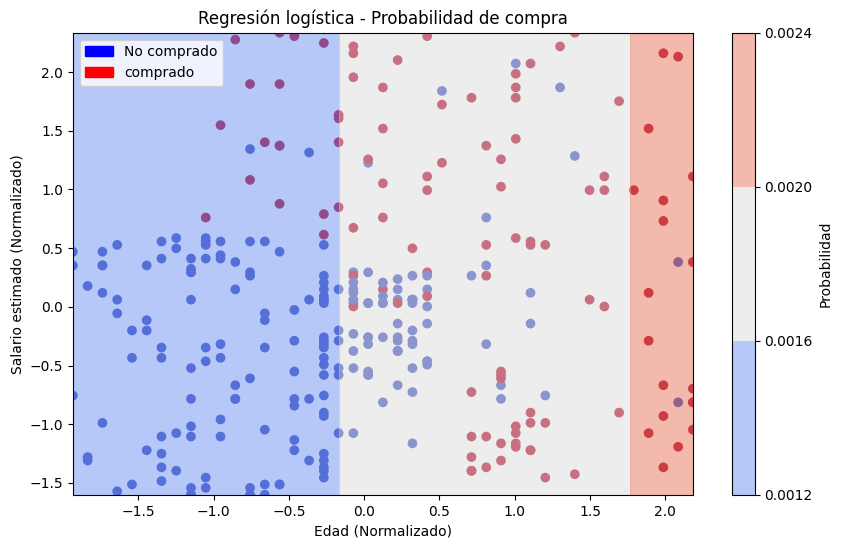

In [177]:

from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches

# Transformo la variable categ칩rica 'Gender' en num칠rica
df2 = pd.get_dummies(df2, columns=['Gender'], drop_first=True)

# Divido el DF en caracter칤sticas (X) y etiqueta (y)
X = df2.drop('Purchased', axis=1)
y = df2['Purchased']

# Divido el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalizo las caracter칤sticas
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_test.mean()) / X_test.std()

# A침ado una columna de unos para el t칠rmino de sesgo
X_train_normalized['Bias'] = 1
X_test_normalized['Bias'] = 1

# Funci칩n sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Inicializo los par치metros beta (sesgo)
beta = np.zeros(X_train_normalized.shape[1])

# Descenso de gradiente
lr = 0.01
num_iter = 1000
for _ in range(num_iter):
    z = np.dot(X_train_normalized, beta)
    p = sigmoid(z)
    gradient = np.dot(X_train_normalized.T, (p - y_train)) / y_train.size
    beta -= lr * gradient

# Funci칩n de predicci칩n
def predict(X, beta):
    return sigmoid(np.dot(X, beta))

# Grafico los datos y la funci칩n de predicci칩n
plt.figure(figsize=(10, 6))
plt.scatter(X_train_normalized['Age'], X_train_normalized['EstimatedSalary'], c=y_train, cmap='coolwarm')
x_vals = np.linspace(X_train_normalized['Age'].min(), X_train_normalized['Age'].max(), 100)
y_vals = np.linspace(X_train_normalized['EstimatedSalary'].min(), X_train_normalized['EstimatedSalary'].max(), 100)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)
Z = np.column_stack((np.ravel(X_vals), np.ravel(Y_vals), np.ones(X_vals.size)))
Z_normalized = (Z - X_train.mean().values) / X_train.std().values
Z_normalized = np.column_stack((Z_normalized, np.ones(Z_normalized.shape[0])))
Z_predicted = predict(Z_normalized, beta).reshape(X_vals.shape)
plt.contourf(X_vals, Y_vals, Z_predicted, alpha=0.5, levels=1, cmap='coolwarm')
plt.colorbar(label='Probabilidad')
plt.xlabel('Edad (Normalizado)')
plt.ylabel('Salario estimado (Normalizado)')
plt.title('Regresi칩n log칤stica - Probabilidad de compra')
plt.legend(handles=[mpatches.Patch(color='blue', label='No comprado'), mpatches.Patch(color='red', label='comprado')])
plt.show()


In [178]:
# Interpretaci칩n del Gr치fico:

# El gr치fico generado muestra el resultado del modelo de regresi칩n log칤stica

# 1. Puntos de datos: Los puntos dispersos en el gr치fico representan los datos de entrenamiento. Cada punto tiene una edad (en el eje X) y un salario estimado (en el eje Y).
# Los puntos est치n coloreados seg칰n si la persona realiz칩 una compra (color diferente) o no (color igual).

# 2. Fondo de colores: El fondo del gr치fico est치 coloreado seg칰n las predicciones del modelo. Las 치reas m치s rojas indican una mayor probabilidad de que una persona
# compre el producto, seg칰n el modelo. Las 치reas m치s azules indican una menor probabilidad de compra.

# 3. Contornos de decisi칩n: Los contornos en el fondo de colores representan los l칤mites de decisi칩n del modelo. En este caso,
# como solo tenemos dos clases (compr칩 o no compr칩), hay un solo l칤mite que separa las dos clases. Este l칤mite es donde la probabilidad de compra es del 50%.

# 4. Interpretaci칩n de colores:
#   - Azul: Representa una baja probabilidad de compra. Los puntos azules en la gr치fica corresponden a las personas con una baja edad y un salario estimado bajo o medio, lo que sugiere que es menos probable que compren el producto.
#   - Rojo: Indica una alta probabilidad de compra. Los puntos rojos en la gr치fica representan a las personas con una edad moderada /Alta y un salario estimado medio/ alto, lo que sugiere que es m치s probable que compren el producto.
#   - Blanco: Representa un 치rea donde el modelo no puede decidir claramente la probabilidad. Esto puede deberse a la falta de datos en esa regi칩n o a la complejidad del problema en esa zona espec칤fica del espacio de caracter칤sticas.

#  En general,se puede interpretar este gr치fico diciendo que, seg칰n el modelo, las personas con salarios m치s altos y edades m치s altas tienden a comprar m치s que las personas con salarios m치s bajos y edades m치s j칩venes. Sin embargo, 
#  es un modelo simple y las decisiones de compra pueden depender de muchos otros factores que no se est치n considerando aqu칤.

# El mapa de colores nos permite identificar visualmente las regiones donde es m치s probable que las personas compren (rojo), donde es menos probable (azul) y donde el modelo tiene dificultades para tomar una decisi칩n clara (blanco).


Una vez realizado un modelo simple de regresi칩n log칤stica, procederemos a calcular su matriz de confusi칩n. La matriz de confusi칩n nos permitir치 evaluar la precisi칩n del modelo al predecir las etiquetas de clase.

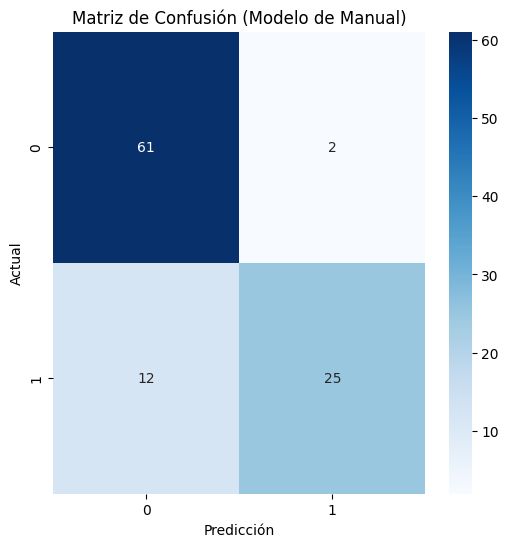

In [184]:
from sklearn.metrics import confusion_matrix

# Predecimos las etiquetas de clase para los datos de prueba
y_pred = (predict(X_test_normalized, beta) > 0.5).astype(int)

# Creamos la matriz de confusi칩n
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusi칩n
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicci칩n')
plt.ylabel('Actual')
plt.title('Matriz de Confusi칩n (Modelo de Manual)')
plt.show()


Por el momento, reservaremos las interpretaciones de la matriz de confusi칩n para cuando tengamos la matriz de confusi칩n del modelo preprogramado, con el fin de comparar ambos modelos.

In [180]:
# Importamos las librerias
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [181]:
# Transformo las variables categ칩ricas
df = pd.get_dummies(df, drop_first=True)

# Divido los datos en caracter칤sticas (X) y etiqueta (y)
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Divido el df en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Escalo las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creo y entreno el modelo de regresi칩n log칤stica
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizo las predicciones
y_pred = model.predict(X_test)

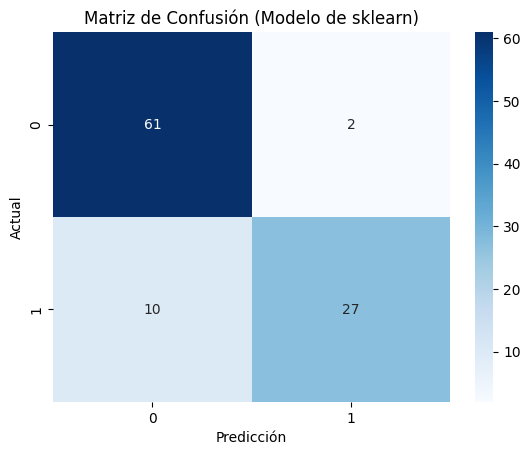

In [183]:
# Creamos Matriz de confusion de modelo pre programado
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusi칩n (Modelo de sklearn)')
plt.xlabel('Predicci칩n')
plt.ylabel('Actual')
plt.show()


## **An치lisis de Resultados**

Los resultados de dos modelos de regresi칩n log칤stica: uno implementado manualmente y otro utilizando una librer칤a ya programada. Ambos modelos muestran resultados similares en cuanto a sus predicciones, lo que sugiere que la implementaci칩n manual es efectiva y produce resultados comparables a los de la librer칤a.

## **Matriz de Confusi칩n - Regresi칩n Log칤stica Manual:**
- Verdaderos positivos: 25
- Falsos positivos: 2
- Verdaderos negativos: 61
- Falsos negativos: 12

## **Matriz de Confusi칩n - Regresi칩n Log칤stica Ya Programada:**
- Verdaderos positivos: 27
- Falsos positivos: 2
- Verdaderos negativos: 61
- Falsos negativos: 10

Ambos modelos muestran un buen desempe침o al predecir los casos negativos, con un n칰mero similar de aciertos y errores en esta categor칤a. Sin embargo, en los casos positivos, el modelo ya programado tiene una ligera ventaja al predecir correctamente dos casos m치s que el modelo manual. En cuanto a los errores, ambos modelos tienen el mismo n칰mero de falsos positivos, pero el modelo manual tiene dos falsos negativos adicionales en comparaci칩n con el modelo ya programado.

Es importante destacar que este an치lisis es un complemento del art칤culo en el blog Nodo-Data, donde se explica detalladamente el funcionamiento de la regresi칩n log칤stica y su capacidad para predecir etiquetas. La regresi칩n log칤stica utiliza una combinaci칩n lineal de variables que se transforma mediante la funci칩n logit inversa, convirti칠ndola en una probabilidad de pertenencia a una clase. Esta transformaci칩n se basa en la relaci칩n de la funci칩n logit con la f칩rmula de las probabilidades(Odds). El punto de corte (autom치ticamente establecido en 50 por el algoritmo) determina si una observaci칩n pertenece o no a una clase.

Espero que este an치lisis y el art칤culo del blog hayan sido 칰tiles para comprender el funcionamiento de la regresi칩n log칤stica. No dudes en compartir tus comentarios o preguntas para mejorar a칰n m치s este an치lisis. 춰Gracias por tu inter칠s y dedicaci칩n! 游놓